In [1]:
cd ..

/Users/dorislee/Desktop/Research/vizdatasci/datasci-api


In [2]:
%load_ext autoreload
%autoreload 2
from dataset.Dataset import Dataset
from dataObj.dataObj import DataObj
from dataObj.Column import Column
from dataObj.Row import Row

This is basically a similar implementation to `enforceSpecifiedChannel` and what we have for default is `setShowMeSpecifiedChannel`

- The way that I did it for `enforceSpecifiedChannel` is not the best way to approach this because it already assumes a set of showMeChannels is determined. But in our case we want to determine this within the showMe function

- The core logic was essentially: 
    - start a empty dict : specifiedChannel ={} 
    - for each channel, if the channel is not specified, then use the showMe defaults.
    - But this does not account for the swap logic, which I think is accounted for by the UI in frontier. 
    - The swap logic is essentially, if I specify x is something but no specify what y is, then we can infer y is whatever field is leftover. In the UI we never have unspecified fields, so replacement based strategy is fine.


In [37]:
dataset = Dataset("data/cars.csv")
dobj = DataObj(dataset,[Column("MilesPerGal", channel="y"),Column("Weight")])

['x', 'y']
[Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>]
<Data Obj: <Dataset Obj: data/cars.csv> -- [Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>, Column <Weight,channel:,dataType:quantitative,dataModel:measure>]>
[Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>]
<Data Obj: <Dataset Obj: data/cars.csv> -- [Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>, Column <Weight,channel:,dataType:quantitative,dataModel:measure>]>
{'x': [], 'y': [Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>]}
y
{'x': Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>, 'y': Column <Weight,channel:x,dataType:quantitative,dataModel:measure>}
<Data Obj: <Dataset Obj: data/cars.csv> -- [Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>, Column <Weight,channel:x,dataType:quantitative,dataModel:measure>]>


In [4]:
import altair as alt
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

In [38]:
dobj.compiled

<Data Obj: <Dataset Obj: data/cars.csv> -- [Column <MilesPerGal,channel:y,dataType:quantitative,dataModel:measure>, Column <Weight,channel:x,dataType:quantitative,dataModel:measure>]>

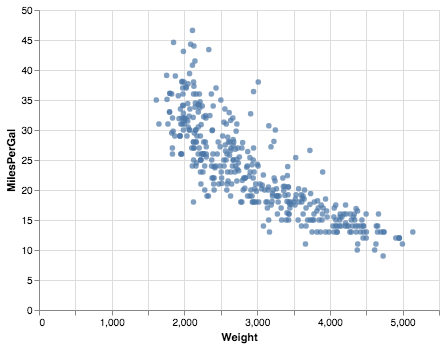

In [39]:
dobj.singleDisplay()

In [122]:
# autoChannel = {"x": Column("MilesPerGal", channel="y"),
#                 "y":Column("Weight")}
autoChannel = {"x": dobj.spec[0],
                "y":dobj.spec[1]}

In [129]:
def enforceSpecifiedChannel(dobj, autoChannel):
    available_channels = list(autoChannel.keys()) 
    # create a dictionary of specified channels in the given dobj
    specifiedDict = {} # specifiedDict={"x":[],"y":[list of Dobj with y specified as channel]}
    for val in available_channels:
        specifiedDict[val]=dobj.getObjFromChannel(val)
    
    # for every specified element, swap with channel that originally contained that element in the autoChannel
    for sVal,sAttr in specifiedDict.items():
        if (len(sAttr)==1): #if specified in dobj
            # remove the specified channel from available channels
            if (len(available_channels)>0):
                available_channels.remove(sVal)
                swapWithChannel = available_channels[0]
                autoChannel[sVal].channel = swapWithChannel
                available_channels.remove(swapWithChannel)
        elif (len(sAttr)>1):
            raise ValueError("There should not be more than one attribute specified in the same channel.")
        elif (len(sAttr)==0): # if unspecified, then populate the channel value with the showMe default
            autoChannel[sVal].channel = sVal
    dobj.spec = list(autoChannel.values())
    return dobj

In [126]:
specifiedDict

{'x': [Column <Weight,channel:x,dataType:,dataModel:>], 'y': []}

In [128]:
for sVal,sAttr in specifiedDict.items():
    if (len(sAttr)==1): #if specified in dobj
        # remove the specified channel from available channels
        if (len(available_channels)>0):
            available_channels.remove(sVal)
            swapWithChannel = available_channels[0]
            autoChannel[sVal].channel = swapWithChannel
            available_channels.remove(swapWithChannel)
    elif (len(sAttr)>1):
        raise ValueError("There should not be more than one attribute specified in the same channel.")
    elif (len(sAttr)==0): # if unspecified, then populate the channel value with the showMe default
        autoChannel[sVal].channel = sVal

In [113]:
dobj.spec = list(autoChannel.values())

In [114]:
dobj

<Data Obj: <Dataset Obj: data/cars.csv> -- [Column <MilesPerGal,channel:x,dataType:,dataModel:>, Column <Weight,channel:y,dataType:,dataModel:>]>

In [87]:
dobj.display()

Mockup(numGraphs=1)